# 単純パーセプトロンで論理回路を学習してみる

In [252]:
!pip install matplotlib

In [253]:
import torch
from torch import nn
from torch import utils
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

## データセットの作成
論理回路の入力$x$と出力$y$のデータセット（教師データ）を作成する
Sigmoid関数の関係上，真理値表は以下のように置き換える
|真理値表の値|コードに入力する値|
|:---:|:------:|
|0|-1|
|1|1|

In [254]:
# 正解のデータ

x=[[0,0],
   [0,0],
   [0,0],
   [0,0]]

y = [[0],[0],[0],[0]]

x = torch.tensor(x,dtype=torch.float)
y = torch.tensor(y,dtype=torch.float)
dataset = utils.data.TensorDataset(x,y)

data_loader = utils.data.DataLoader(dataset,batch_size=1)

for a,b in data_loader:
   print(a,b)

tensor([[0., 0.]]) tensor([[0.]])
tensor([[0., 1.]]) tensor([[1.]])
tensor([[1., 0.]]) tensor([[1.]])
tensor([[1., 1.]]) tensor([[0.]])


## モデルの定義
単純パーセプトロンのモデルの定義を行う
活性化関数としてシグモイドを利用

In [255]:
model = nn.Sequential(nn.Linear(2,1),
                      nn.Sigmoid())

## 損失関数・最適化関数の定義

In [256]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

## 学習
今回は，教師データの全てが学習できているかを確認するだけなので，過学習気味に行う

In [257]:
epochs = 2000

In [258]:
model.train()

for epoch in tqdm(range(epochs)):
    for input, correct_answer in data_loader:
        outputs = model(input)
        loss = criterion(outputs,correct_answer)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

100%|██████████| 2000/2000 [00:01<00:00, 1887.00it/s]


## 推論
色々な値を入力し，推論が正しいか判別するとともに，正しく学習できているか確認してみよう

In [259]:
model.eval()

input = [[0,0]]
input = torch.Tensor(input)
input = torch.unsqueeze(input,dim=0)

with torch.inference_mode():
    outputs = model(input)
    inference = torch.squeeze(outputs,dim=0)
    print('推論結果：',inference.item())

推論結果： 0.3904755711555481


## 線形分離の可視化
作ったニューラルネットが，どのような判定の概形を作っているのか確認しよう
### 仕組み
~~ランダムにx1,x2を決めてその値を推論．出力結果は，$y^{\prime}$:ニューラルネットの出力，$y$：最終的な出力として~~
$$
% y= 
% \left\{
% \begin{array}{ll}
% 1 & y^{\prime} \geqq 0.5 \\
% 0 & y^{\prime} < 0.5
% \end{array}
% \right.
% $$

~~としてプロットする~~

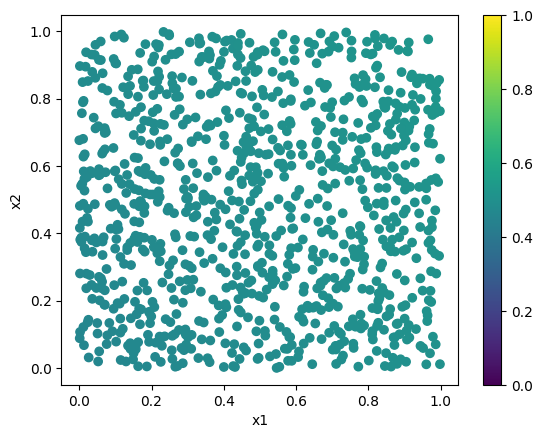

In [260]:
model.eval()

xforPlot = []
rng = np.random.default_rng()
x1 = rng.uniform(0,1,1000) # 1000個のランダムなx1座標
x2 = rng.uniform(0,1,1000) # 1000個のランダムなx2座標


for a,b in zip(x1,x2):
  xforPlot.append([a,b])

outputs = model(torch.Tensor(xforPlot))
outputs = outputs.squeeze()
#outputs = torch.where(outputs>=0.5, 1,0)
outputs = outputs.detach().numpy()

plt.scatter(x1,x2,c=outputs, vmin=0, vmax=1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()